In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import sys
sys.path.append('../')
from auxPlots import interpolateData,getContours,saveContours,Cq,Cg

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.colormaps['RdYlBu']


pd.set_option('display.max_rows', 200)

### Load Recast Data

In [2]:
recastData = pd.read_pickle('../../Recast/CMS-TOP-20-001_mtt/pp2tt_eft_scan.pcl')

### Add limits for Cg and Cq

In [3]:
Cgmax = []
Cqmax = []
gs = np.sqrt(1.63362817)
for irow,row in recastData.iterrows():
    Cgmax.append(Cg(row['mChi'],row['mST'],row['yDMexp (95% C.L.)'],gs))
    Cqmax.append(Cq(row['mChi'],row['mST'],row['yDMexp (95% C.L.)'],gs))
recastData['Cg (95% C.L.)'] = Cgmax
recastData['Cq (95% C.L.)'] = Cqmax

### Plot limit on yDM

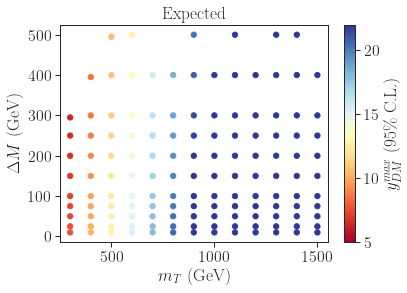

In [4]:
x = recastData['mST']
y = recastData['mChi']
dm = x-y
z = recastData['yDMexp (95% C.L.)']
plt.scatter(x,dm,c=z,cmap=cm,s=30,vmin=5.,vmax=22.)
plt.colorbar(label=r'$y_{DM}^{max}$ (95\% C.L.)')
plt.xlabel(r'$m_T$ (GeV)')
plt.ylabel(r'$\Delta M$ (GeV)')
plt.xlim(250.,1550.)
plt.title('Expected')
# plt.yscale('log')
plt.show()

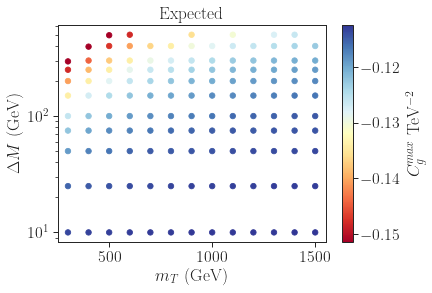

In [5]:
x = recastData['mST']
y = recastData['mChi']
dm = x-y
z = recastData['Cg (95% C.L.)']*1e6
plt.scatter(x,dm,c=z,cmap=cm,s=30)
plt.colorbar(label=r'$C_{g}^{max}$ TeV$^{-2}$')
plt.xlabel(r'$m_T$ (GeV)')
plt.ylabel(r'$\Delta M$ (GeV)')
plt.xlim(250.,1550.)
plt.yscale('log')
plt.title('Expected')
plt.show()

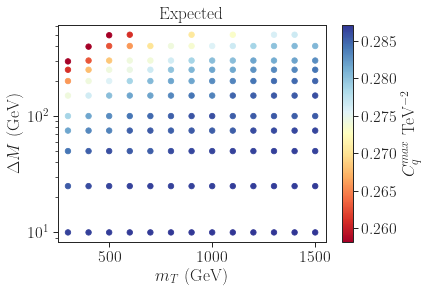

In [6]:
x = recastData['mST']
y = recastData['mChi']
dm = x-y
z = recastData['Cq (95% C.L.)']*1e6
plt.scatter(x,dm,c=z,cmap=cm,s=30)
plt.colorbar(label=r'$C_{q}^{max}$ TeV$^{-2}$')
plt.xlabel(r'$m_T$ (GeV)')
plt.ylabel(r'$\Delta M$ (GeV)')
plt.xlim(250.,1550.)
plt.yscale('log')
plt.title('Expected')
plt.show()

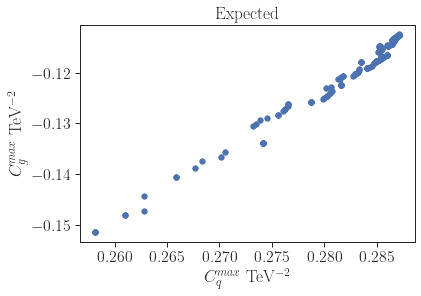

In [7]:
x = recastData['Cq (95% C.L.)']*1e6
y = recastData['Cg (95% C.L.)']*1e6
plt.scatter(x,y,s=30)
plt.xlabel(r'$C_{q}^{max}$ TeV$^{-2}$')
plt.ylabel(r'$C_{g}^{max}$ TeV$^{-2}$')
# plt.xlim(250.,1550.)
# plt.yscale('log')
plt.title('Expected')
plt.show()

### Interpolate for a denser grid

In [8]:
# Interpolate to create more points
x = recastData['mST']
y = recastData['mChi']
z = recastData['yDMexp (95% C.L.)']
dm = x-y
xnew,ynew,znew = interpolateData(x,dm,z)
# Get contours
cValues = sorted([10.,12.,15.,20.])
contoursDict = getContours(xnew,ynew,znew,cValues)

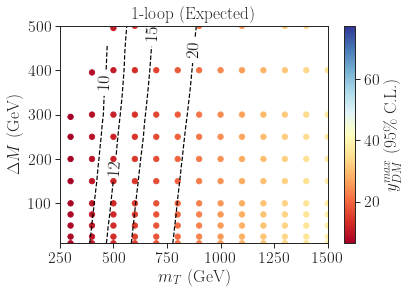

In [9]:
plt.figure(figsize=(6,4))
plt.scatter(x,dm,c=z,cmap=cm,s=30)

plt.colorbar(label=r'$y_{DM}^{max}$ (95\% C.L.)')
plt.xlabel(r'$m_{T}$ (GeV)')
plt.ylabel(r'$\Delta M$ (GeV)')
contours = plt.contour(xnew, ynew, znew, cValues, colors='black',linestyles='dashed')
plt.clabel(contours, inline=True, fontsize=18)
plt.title('1-loop (Expected)')
plt.xlim(250.,1500.)
plt.show()

In [10]:
recastData[recastData['mST'] ==600.][['mST','mChi','yDMexp (95% C.L.)']]

,mST,mChi,yDMexp (95% C.L.)
30,600.0,100.0,12.871060
31,600.0,200.0,13.224679
32,600.0,300.0,13.769846
33,600.0,350.0,13.977586
34,600.0,400.0,14.298498
35,600.0,450.0,14.600090
36,600.0,500.0,14.903315
37,600.0,525.0,15.054483
38,600.0,550.0,15.184958
39,600.0,575.0,15.342179


In [11]:
recastData[recastData['mST'] ==500.][['mST','mChi','yDMexp (95% C.L.)']]

,mST,mChi,yDMexp (95% C.L.)
19,500.0,5.0,10.596747
20,500.0,100.0,10.793007
21,500.0,200.0,11.174885
22,500.0,250.0,11.475175
23,500.0,300.0,11.705427
24,500.0,350.0,12.022071
25,500.0,400.0,12.314398
26,500.0,425.0,12.446529
27,500.0,450.0,12.624125
28,500.0,475.0,12.761012


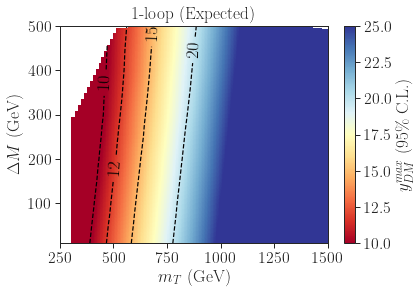

In [12]:
plt.figure(figsize=(6,4))
plt.imshow(znew.T, extent=[x.min(),x.max(), dm.min(), dm.max()], origin='lower',
                  cmap=cm,aspect='auto',vmin=10,vmax=25)
plt.colorbar(label=r'$y_{DM}^{max}$ (95\% C.L.)')
plt.xlabel(r'$m_{T}$ (GeV)')
plt.ylabel(r'$\Delta M$ (GeV)')
contours = plt.contour(xnew, ynew, znew, cValues, colors='black',linestyles='dashed')
plt.clabel(contours, inline=True, fontsize=18)
plt.title('1-loop (Expected)')
plt.xlim(250.,1500.)
plt.show()